# UnSupervised Learning

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("google_mobility.csv")
print("I have been calling this as iunsupervised Learning Because No Target Variable in Dataset")
df.head()

I have been calling this as iunsupervised Learning Because No Target Variable in Dataset


c:\python\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,country_region_code,lat,lng,wikidata,short_code,country_region,sub_region_1,sub_region_2,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,23.78333,54.0,Q878,AE,United Arab Emirates,NaN,NaN,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,23.78333,54.0,Q878,AE,United Arab Emirates,NaN,NaN,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,23.78333,54.0,Q878,AE,United Arab Emirates,NaN,NaN,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,23.78333,54.0,Q878,AE,United Arab Emirates,NaN,NaN,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,23.78333,54.0,Q878,AE,United Arab Emirates,NaN,NaN,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0


# Data Cleaning

In [3]:
df.isna().sum()

country_region_code                                       72
lat                                                        0
lng                                                        0
wikidata                                                  72
short_code                                            144204
country_region                                             0
sub_region_1                                            9504
sub_region_2                                           93853
date                                                       0
retail_and_recreation_percent_change_from_baseline     45133
grocery_and_pharmacy_percent_change_from_baseline      52395
parks_percent_change_from_baseline                    160629
transit_stations_percent_change_from_baseline         133385
workplaces_percent_change_from_baseline                10868
residential_percent_change_from_baseline              124986
dtype: int64

In [4]:
### Since there are lot of null Values we need to Seperate Categorical and Numerical Data

numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print(numerical_features)
categorical_features = [feature for feature in df.columns if feature not in numerical_features]
print(categorical_features)

['lat', 'lng', 'retail_and_recreation_percent_change_from_baseline', 'grocery_and_pharmacy_percent_change_from_baseline', 'parks_percent_change_from_baseline', 'transit_stations_percent_change_from_baseline', 'workplaces_percent_change_from_baseline', 'residential_percent_change_from_baseline']
['country_region_code', 'wikidata', 'short_code', 'country_region', 'sub_region_1', 'sub_region_2', 'date']


In [5]:
### Mow lets see the numerical data
df[numerical_features].head()

,lat,lng,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,23.78333,54.0,0.0,4.0,5.0,0.0,2.0,1.0
1,23.78333,54.0,1.0,4.0,4.0,1.0,2.0,1.0
2,23.78333,54.0,-1.0,1.0,5.0,1.0,2.0,1.0
3,23.78333,54.0,-2.0,1.0,5.0,0.0,2.0,1.0
4,23.78333,54.0,-2.0,0.0,4.0,-1.0,2.0,1.0


In [6]:
print("Since there are lot a number of missing value lets replace nan values with median")
df[numerical_features].isna().sum()

Since there are lot a number of missing value lets replace nan values with median


lat                                                        0
lng                                                        0
retail_and_recreation_percent_change_from_baseline     45133
grocery_and_pharmacy_percent_change_from_baseline      52395
parks_percent_change_from_baseline                    160629
transit_stations_percent_change_from_baseline         133385
workplaces_percent_change_from_baseline                10868
residential_percent_change_from_baseline              124986
dtype: int64

In [7]:
### Replacing nan values with median

for feature in numerical_features:
    median = df[feature].median()
    
    df[feature].fillna(median, inplace=True)
    
df[numerical_features].isna().sum()

lat                                                   0
lng                                                   0
retail_and_recreation_percent_change_from_baseline    0
grocery_and_pharmacy_percent_change_from_baseline     0
parks_percent_change_from_baseline                    0
transit_stations_percent_change_from_baseline         0
workplaces_percent_change_from_baseline               0
residential_percent_change_from_baseline              0
dtype: int64

In [8]:
### Similarly for the categorical data lets replace nan with Missing

for feature in categorical_features:
    
    df[feature].fillna("Missing", inplace = True)
df[categorical_features].isna().sum()

country_region_code    0
wikidata               0
short_code             0
country_region         0
sub_region_1           0
sub_region_2           0
date                   0
dtype: int64

In [9]:
### Now lets check for the duplicates

df.duplicated().sum()

0

In [10]:
df.describe()

,lat,lng,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
count,284489.000000,284489.000000,284489.000000,284489.000000,284489.000000,284489.000000,284489.000000,284489.000000
mean,35.288426,-57.819715,-19.209737,-4.024939,-4.505872,-21.069511,-21.623145,8.894379
std,16.896916,58.855707,27.448014,18.560173,27.080856,22.250574,22.256408,7.537417
min,-54.362000,-161.755800,-100.000000,-100.000000,-100.000000,-100.000000,-94.000000,-25.000000
25%,33.156639,-93.212367,-37.000000,-10.000000,-4.000000,-21.000000,-38.000000,5.000000
50%,38.455034,-82.850478,-15.000000,-1.000000,-4.000000,-18.000000,-23.000000,8.000000
75%,43.407780,-7.416670,2.000000,5.000000,-4.000000,-15.000000,0.000000,11.000000
max,70.020652,178.017780,313.000000,337.000000,430.000000,497.000000,248.000000,54.000000


# EXPLORATORY DATA ANALYSIS(EDA)

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

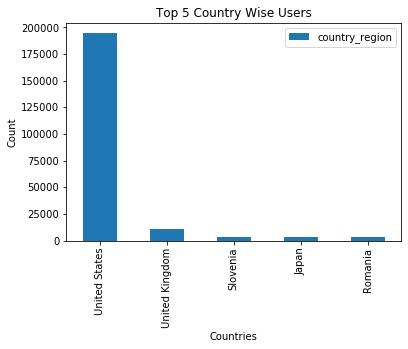

In [12]:
### Since this is a Googles Country Data we need to find out which country has most users

counts = pd.value_counts(df['country_region'], sort = True)
### Since there are more countries We need to concentrate only on top 5 Countries
count = pd.DataFrame(counts)
count = count.sort_values("country_region",ascending=False).head()

count.plot(kind = 'bar')
plt.xlabel("Countries")
plt.ylabel("Count")
plt.title("Top 5 Country Wise Users")
plt.show()

In [13]:
gb1 = df.groupby("date")["retail_and_recreation_percent_change_from_baseline"].count()
gb2 = df.groupby("date")["grocery_and_pharmacy_percent_change_from_baseline"].count()
gb3 = df.groupby("date")["parks_percent_change_from_baseline"].count()
gb4 = df.groupby("date")["transit_stations_percent_change_from_baseline"].count()
gb5 = df.groupby("date")["workplaces_percent_change_from_baseline"].count()
gb6 = df.groupby("date")["residential_percent_change_from_baseline"].count()

In [14]:
gb1 = pd.DataFrame(gb1)
gb2 = pd.DataFrame(gb2)
gb3 = pd.DataFrame(gb3)
gb4 = pd.DataFrame(gb4)
gb5 = pd.DataFrame(gb5)
gb6 = pd.DataFrame(gb6)

In [15]:
gb1 = gb1.sort_values("retail_and_recreation_percent_change_from_baseline", ascending = False).head()
gb2 = gb2.sort_values("grocery_and_pharmacy_percent_change_from_baseline", ascending = False).head()
gb3 = gb3.sort_values("parks_percent_change_from_baseline", ascending=False).head()
gb4 = gb4.sort_values("transit_stations_percent_change_from_baseline", ascending=False).head()
gb5 = gb5.sort_values("workplaces_percent_change_from_baseline",ascending=False).head()
gb6 = gb6.sort_values("residential_percent_change_from_baseline",ascending=False).head()

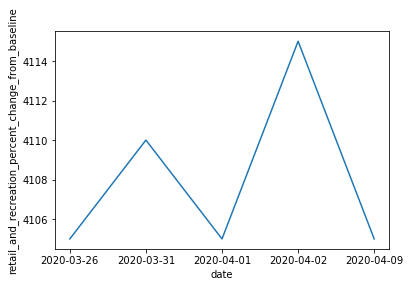

In [16]:
sns.lineplot(x=gb1.index, y="retail_and_recreation_percent_change_from_baseline", data = gb1)

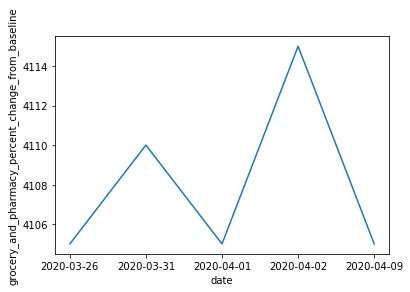

In [17]:
sns.lineplot(x=gb2.index, y="grocery_and_pharmacy_percent_change_from_baseline", data = gb2)

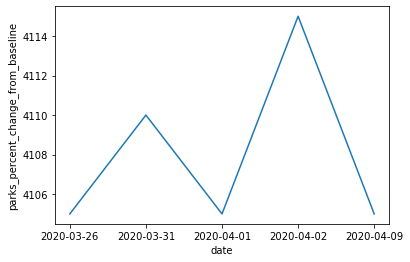

In [18]:
sns.lineplot(x=gb3.index, y="parks_percent_change_from_baseline", data = gb3)

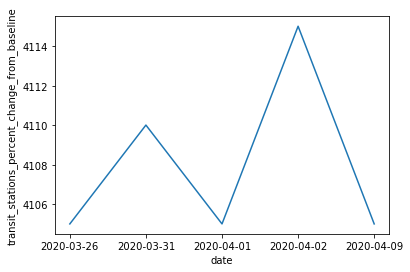

In [19]:
sns.lineplot(x=gb4.index, y="transit_stations_percent_change_from_baseline", data = gb4)

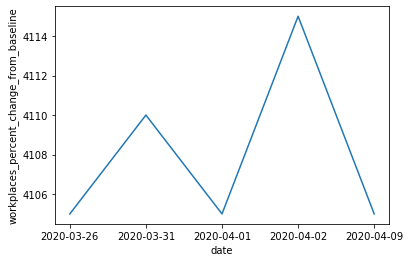

In [20]:
sns.lineplot(x=gb5.index, y="workplaces_percent_change_from_baseline", data = gb5)

From the above few lineplots its clearly understand that every features are varying equally with respect to the dates which Means the data is highly coreelated with each other

# FEATURE ENGINEERING

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
lb = LabelEncoder().fit_transform(df.country_region)

In [23]:
df.drop(categorical_features, axis=1, inplace=True)
df.head()

,lat,lng,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,23.78333,54.0,0.0,4.0,5.0,0.0,2.0,1.0
1,23.78333,54.0,1.0,4.0,4.0,1.0,2.0,1.0
2,23.78333,54.0,-1.0,1.0,5.0,1.0,2.0,1.0
3,23.78333,54.0,-2.0,1.0,5.0,0.0,2.0,1.0
4,23.78333,54.0,-2.0,0.0,4.0,-1.0,2.0,1.0


In [24]:
scalar = MinMaxScaler().fit_transform(df)

In [26]:
scaled_data = pd.DataFrame(scalar, columns=["lat","lng","retail_and_recreation_percent_change_from_baseline","grocery_and_pharmacy_percent_change_from_baseline","parks_percent_change_from_baseline","transit_stations_percent_change_from_baseline","workplaces_percent_change_from_baseline","residential_percent_change_from_baseline"])

In [27]:
scaled_data['country_region'] = lb

In [28]:
scaled_data.head()

,lat,lng,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,country_region
0,0.628266,0.634999,0.242131,0.237986,0.198113,0.167504,0.280702,0.329114,123
1,0.628266,0.634999,0.244552,0.237986,0.196226,0.169179,0.280702,0.329114,123
2,0.628266,0.634999,0.239709,0.231121,0.198113,0.169179,0.280702,0.329114,123
3,0.628266,0.634999,0.237288,0.231121,0.198113,0.167504,0.280702,0.329114,123
4,0.628266,0.634999,0.237288,0.228833,0.196226,0.165829,0.280702,0.329114,123


In [29]:
scaled_data = scaled_data.round(3)
scaled_data.head()

,lat,lng,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,country_region
0,0.628,0.635,0.242,0.238,0.198,0.168,0.281,0.329,123
1,0.628,0.635,0.245,0.238,0.196,0.169,0.281,0.329,123
2,0.628,0.635,0.240,0.231,0.198,0.169,0.281,0.329,123
3,0.628,0.635,0.237,0.231,0.198,0.168,0.281,0.329,123
4,0.628,0.635,0.237,0.229,0.196,0.166,0.281,0.329,123


In [30]:
for feature in scaled_data.columns:
    print("{} has {} Unique Values".format(feature, scaled_data[feature].nunique()))

lat has 577 Unique Values
lng has 519 Unique Values
retail_and_recreation_percent_change_from_baseline has 254 Unique Values
grocery_and_pharmacy_percent_change_from_baseline has 250 Unique Values
parks_percent_change_from_baseline has 360 Unique Values
transit_stations_percent_change_from_baseline has 254 Unique Values
workplaces_percent_change_from_baseline has 185 Unique Values
residential_percent_change_from_baseline has 68 Unique Values
country_region has 132 Unique Values


In [31]:
scaled_data.drop(0,axis=0, inplace=True)

# MODEL DEVELOPMENT

In [33]:
wcss = []
k = range(1,15)

for k in k:
    km = KMeans(n_clusters=k)
    km.fit(scaled_data)
    wcss.append(km.inertia_)

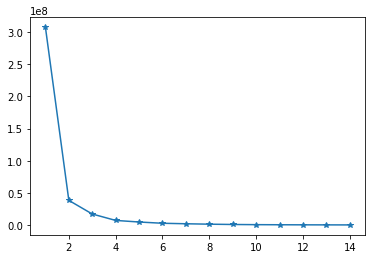

In [37]:
plt.plot(range(1,15), wcss, marker="*")

From the Above Elbow Diagram its Clear we nedd to form 4 Clusters

In [38]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(scaled_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [39]:
np.unique(kmeans.labels_)

array([0, 1, 2, 3])

In [40]:
centroides = kmeans.cluster_centers_

In [41]:
centroides

array([[7.46203770e-01, 2.30917189e-01, 2.05096172e-01, 2.27269393e-01,
        1.86418569e-01, 1.37224120e-01, 2.13908481e-01, 4.22909373e-01,
        1.24724429e+02],
       [6.73445653e-01, 5.95516291e-01, 1.78235242e-01, 2.04946920e-01,
        1.68390442e-01, 1.22080887e-01, 2.11205157e-01, 4.40846747e-01,
        5.72503031e+01],
       [6.10887020e-01, 4.41773209e-01, 1.62066868e-01, 1.97258145e-01,
        1.57930723e-01, 1.13591566e-01, 2.04481915e-01, 4.49367140e-01,
        2.22973813e+01],
       [6.50248159e-01, 5.23220960e-01, 1.61890984e-01, 1.89264487e-01,
        1.57323188e-01, 1.14236179e-01, 1.98692031e-01, 4.53050448e-01,
        9.63811341e+01]])

In [43]:
centroids = pd.DataFrame(centroides, columns = ["lat","lng","retail_and_recreation_percent_change_from_baseline","grocery_and_pharmacy_percent_change_from_baseline","parks_percent_change_from_baseline","transit_stations_percent_change_from_baseline","workplaces_percent_change_from_baseline","residential_percent_change_from_baseline","country_region"])
centroids

,lat,lng,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,country_region
0,0.746204,0.230917,0.205096,0.227269,0.186419,0.137224,0.213908,0.422909,124.724429
1,0.673446,0.595516,0.178235,0.204947,0.168390,0.122081,0.211205,0.440847,57.250303
2,0.610887,0.441773,0.162067,0.197258,0.157931,0.113592,0.204482,0.449367,22.297381
3,0.650248,0.523221,0.161891,0.189264,0.157323,0.114236,0.198692,0.453050,96.381134


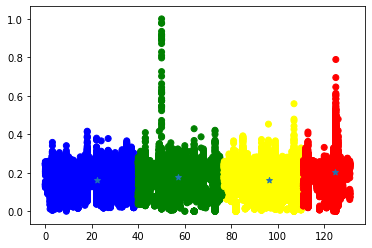

In [44]:
colormap = np.array(["red","green","blue","yellow"])

plt.scatter(scaled_data.country_region,scaled_data.retail_and_recreation_percent_change_from_baseline,c=colormap[kmeans.labels_])
plt.scatter(centroids.country_region,centroids.retail_and_recreation_percent_change_from_baseline, marker='*')